In [1]:
from IPython.display import HTML


 <h1><b><i>Sentiment Analysis on Restaurant Reviews</i></b></h1>



*   <h3> This notebook deals with the sentiment Analysis of restaurant Reviews using different algorithmns</h3>




<h1><b><i>About the data</i></b></h1>

*   <h3><b>Data Overview: </b> This dataset contains 1000+ rows with only 2 features ... which basically are reviews </h3>
<br>

<h3>The <b>first feature</b> is <b>REVIEW </b> which contains text-like information about the review or comment that customer may given to a restaurant </h3>
<br>
<h3>The <b>second feature</b> is <b>Liked </b> which contains boolean-like information about the review or comment that customer may given to a restaurant ... Generally we can understand as positive or negative feedback or something else</h3>

#  Importing the libraries

# Library Loading

In [2]:
# Importing essential Libraries

# NumPy is used for numerical computations and working with arrays.
import numpy as np

# Pandas is used for data manipulation and analysis.
import pandas as pd


# Exploratory Data Analysis (EDA)

<p>Exploratory Data Analysis (EDA) is a data analysis approach aimed at summarizing and visualizing data to understand its key characteristics and patterns before formal statistical modeling or hypothesis testing.</p>

<h2><b>Data Loading</b></h2>
<br>
<p>
Data loading is the process of importing or reading datasets from various sources, such as files (e.g., CSV, Excel), databases, or APIs, into a data analysis environment or software for further processing and analysis.</p>

In [3]:
df = pd.read_csv("/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

<h2><b>Descriptive Data Analysis</b></h2>
<br>
<p>Descriptive Data Analysis is the process of using statistical and visual techniques to summarize and present key features, patterns, and insights from a dataset, typically involving measures like means, medians, standard deviations, histograms, and scatter plots to provide an overview of the data's characteristics.</p>

In [4]:
df.shape

(1000, 2)

In [5]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
df.sample(5)

,Review,Liked
830,Do yourself a favor and stay away from this dish.,0
877,Go To Place for Gyros.,1
949,"Maybe it's just their Vegetarian fare, but I'v...",0
555,I know this is not like the other restaurants ...,0
950,It wasn't busy at all and now we know why.,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [11]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [12]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [13]:
df.duplicated().sum()

4

# **Feature Engineering**
<br>
<p>Feature engineering is the process of creating new, meaningful, and informative features (variables) from existing data or transforming existing features to improve the performance of machine learning models and enhance their ability to make accurate predictions or classifications.</p>

In [14]:
df['Length'] = df['Review'].apply(len)
df.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


# **Data Preprocessing**
<br>
<p>Feature engineering is the process of creating, selecting, or transforming features (variables) in a dataset to improve the performance of machine learning models by making them more informative and relevant for the specific task at hand, such as predictive modeling or classification.</p>

<h2><b>Importing essential NLP libraries</b></h2>

In [15]:
import nltk
import re

# Download NLTK stopwords data
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# Cleaning the Reviews and Creating a Corpus

# The purpose of this code is to clean a collection of text reviews and create a corpus of cleaned reviews.
# The corpus is a list where each element is a cleaned version of a review.

# Initialize an empty list to store the cleaned reviews.
corpus = []

# Loop through the first 1000 reviews (adjust the range as needed) in the DataFrame 'df'.
for i in range(0, 1000):

    # Step 1: Removing non-alphabetical characters
    # Using regular expressions, substitute any characters that are not in the range 'a' to 'z' with a space.
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

    # Step 2: Converting text to lowercase
    # Convert the entire review to lowercase to ensure consistency.
    review = review.lower()

    # Step 3: Tokenization
    # Split the review into individual words.
    review_words = review.split()

    # Step 4: Removing Stop Words
    # Remove common English stop words (e.g., 'the', 'and', 'in') from the list of words.
    # Stop words do not carry significant meaning for text analysis.
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

    # Step 5: Stemming
    # Apply stemming to reduce words to their root form (e.g., 'running' becomes 'run').
    # This helps in reducing the dimensionality of the text data.
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Step 6: Rejoining Tokens
    # Join the cleaned and stemmed words back into a single string.
    review = ' '.join(review)

    # Step 7: Append to Corpus
    # Add the cleaned and processed review to the corpus list.
    corpus.append(review)

# After running this code, 'corpus' will contain a list of cleaned reviews suitable for further text analysis.


<!DOCTYPE html>
<html>
<head>
  <title>Explaining Data Cleaning and Corpus Creation</title>
  <style>
    body {
      background-color: lightblue;
      padding: 20px;
    }
  </style>
</head>
<body>
  <h1>Cleaning the Reviews and Creating a Corpus</h1>

  <p>The provided code snippet exemplifies a crucial phase in text data preprocessing, where raw text reviews undergo a series of transformations to create a cleaned and structured corpus. This corpus is a fundamental resource for various natural language processing (NLP) and text analysis tasks.</p>

  <h2>Code Purpose:</h2>

  <p>The primary objective of this code is to prepare textual data for subsequent analysis by eliminating extraneous information, standardizing text, and breaking it down into manageable components. Let's delve into the step-by-step explanation of what this code accomplishes:</p>

  <h3>1. Initialization:</h3>

  <p>To begin, an empty list named 'corpus' is initialized:</p>

  <pre><code>corpus = []</code></pre>

  <p>This list will serve as a container to store the cleaned reviews once they are processed.</p>

  <h3>2. Loop Through Reviews:</h3>

  <p>Next, the code initiates a loop to iterate through a collection of text reviews. In this specific instance, the loop focuses on the first 1000 reviews found within a DataFrame named 'df.' However, it's crucial to note that this range can be adjusted based on the specific dataset and requirements:</p>

  <pre><code>for i in range(0, 1000):</code></pre>

  <h3>3. Data Cleaning Steps:</h3>

  <p>The heart of this code lies in the various data cleaning and preprocessing steps applied to each review. These steps ensure that the text data becomes suitable for subsequent analysis. Here are the key steps:</p>

  <h4>Step 1: Removing Non-Alphabetical Characters:</h4>

  <p>Within this step, the code employs regular expressions to identify and substitute any characters that do not fall within the 'a' to 'z' range with a space. The result is a review with non-alphabetical characters and special symbols effectively removed:</p>

  <pre><code>review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])</code></pre>

  <h4>Step 2: Converting Text to Lowercase:</h4>

  <p>Uniformity in text data is crucial, and to ensure this, the entire review is converted to lowercase:</p>

  <pre><code>review = review.lower()</code></pre>

  <h4>Step 3: Tokenization:</h4>

  <p>Tokenization involves splitting the review into individual words, treating each word as a separate token:</p>

  <pre><code>review_words = review.split()</code></pre>

  <h4>Step 4: Removing Stop Words:</h4>

  <p>Common English stop words, such as 'the,' 'and,' and 'in,' are often devoid of meaningful information in text analysis. Hence, the code filters out these stop words from the list of words:</p>

  <pre><code>review_words = [word for word in review_words if not word in set(stopwords.words('english'))]</code></pre>

  <h4>Step 5: Stemming:</h4>

  <p>Stemming is employed to reduce words to their root form, helping to reduce the dimensionality of the text data. For example, 'running' becomes 'run.' Stemming aims to capture the core meaning of words:</p>

  <pre><code>ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]</code></pre>

  <h4>Step 6: Rejoining Tokens:</h4>

  <p>After cleaning and stemming individual tokens, the code rejoins them into a single string, effectively reconstructing the review:</p>

  <pre><code>review = ' '.join(review)</code></pre>

  <h4>Step 7: Append to Corpus:</h4>

  <p>Finally, the processed and cleaned review is appended to the 'corpus' list, ensuring that each element of the 'corpus' represents a cleaned review:</p>

  <pre><code>corpus.append(review)</code></pre>

  <p>Upon completion of this code, the 'corpus' will contain a structured list of cleaned reviews, which is ready for further text analysis, including tasks such as sentiment analysis, topic modeling, or document classification.</p>

  <p>In essence, this code showcases the critical role of data cleaning and preprocessing in NLP and text analysis workflows. By transforming raw text into a clean and structured corpus, it lays the foundation for extracting valuable insights and patterns from textual data.</p>

  <p>With this understanding, practitioners can apply similar techniques to process and analyze text data in various real-world scenarios.</p>

</body>
</html>


In [18]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

# Word CLoud

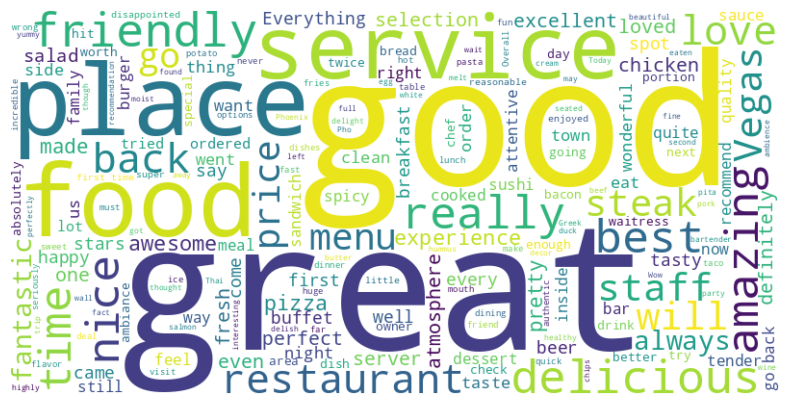

In [19]:
# import library
# positive review

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Creating a Bag of Words Model

# In this code, we create a Bag of Words (BoW) model from the 'corpus' of cleaned text reviews.

# Import the CountVectorizer class from scikit-learn, which is used to convert text data into numerical features.
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer with a specified maximum number of features (max_features).
# The 'max_features' parameter controls the number of most frequent words to keep in the vocabulary.
# Adjust this value based on your specific requirements.
cv = CountVectorizer(max_features=1500)

# Apply the CountVectorizer to the 'corpus' to transform the text data into a numerical representation.
# The 'fit_transform' method converts the text into a sparse matrix where rows represent reviews and columns represent words.
X = cv.fit_transform(corpus).toarray()

# 'X' now contains the BoW representation of the text data.

# Extract the target variable 'y' from the DataFrame 'df'.
# Assuming the target variable is located in the second column (index 1) of the DataFrame.
y = df.iloc[:, 1].values

# 'y' now contains the labels or target values corresponding to each review.

# The resulting 'X' and 'y' can be used to train machine learning models for tasks such as sentiment analysis or text classification.


<h2><b>Data Splitting</b></h2>

In [21]:
# Splitting the Dataset into Training and Testing Sets

# In this code, we split the dataset into training and testing sets to evaluate the performance of a machine learning model.

# Import the 'train_test_split' function from scikit-learn, which is used for splitting datasets.

########################################################################################

from sklearn.model_selection import train_test_split

# Split the feature matrix 'X' and the target variable 'y' into training and testing sets.
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split.
# Here, 20% of the data is reserved for testing (test_size=0.20).
# The 'random_state' parameter ensures reproducibility by fixing the random seed for the split.
# This means that the same split will be obtained every time you run the code with the same random_state value.

############################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


###########################################################################

# 'X_train' and 'y_train' contain the features and labels for the training set, respectively.
# 'X_test' and 'y_test' contain the features and labels for the testing set, respectively.

# The dataset is typically divided into a training set (used to train the model) and a testing set (used to evaluate the model's performance).
# The proportions used in this split can be adjusted based on the specific requirements of your analysis.

# In this example, the dataset contains 1000 samples, and 80% (800 samples) are used for training,
# while 20% (200 samples) are used for testing. These proportions can be modified as needed.


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# **Model Training**

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Define a dictionary of models with their names as keys and model instances as values
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=1000),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    # Add more models as needed
}

# Create an empty dictionary to store model accuracies
model_accuracies = {}

# Loop through each model and train/evaluate it
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate accuracy for the model
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy in the model_accuracies dictionary
    model_accuracies[model_name] = accuracy

# Rank the models based on accuracy (highest to lowest)
ranked_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

# Print the ranked models
print("Model Rankings (Accuracy):")
for rank, (model_name, accuracy) in enumerate(ranked_models, start=1):
    print(f"{rank}. {model_name}: {accuracy * 100:.2f}%")


Model Rankings (Accuracy):
1. MultinomialNB: 76.50%
2. MLPClassifier: 74.50%
3. GradientBoostingClassifier: 73.50%
4. SVC: 73.50%
5. LogisticRegression: 71.00%
6. AdaBoostClassifier: 71.00%
7. RandomForestClassifier: 70.00%
8. BaggingClassifier: 70.00%
9. ExtraTreesClassifier: 70.00%
10. DecisionTreeClassifier: 67.00%
11. KNeighborsClassifier: 58.50%


<h1><b>As we can see the above code ... The MultinomialNB is the best possible model with highest accuracy ... so there's no need to train models with lesser accuracy in our case</b></h1>

In [24]:
# Naive Bayes Classifier for Text Classification

# In this code, a Multinomial Naive Bayes classifier is used for text classification.

# Import the Multinomial Naive Bayes classifier from scikit-learn.
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier.
clf = MultinomialNB()

# Train (fit) the classifier using the training data.
# 'X_train' contains the features (BoW representation of text data).
# 'y_train' contains the corresponding labels or target values.
clf.fit(X_train, y_train)

# At this point, the Multinomial Naive Bayes classifier 'clf' has been trained on the training data.

# Naive Bayes classifiers are commonly used in NLP tasks such as text classification (e.g., spam detection, sentiment analysis).
# They are known for their simplicity and effectiveness when dealing with text data.


MultinomialNB()

In [25]:
# Predicting the Test set results

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_true = y_test

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Convert the metrics to percentages
accuracy_percent = accuracy * 100
precision_percent = precision * 100
recall_percent = recall * 100
f1_percent = f1 * 100

# Print the metrics as percentages
print("Accuracy: {:.2f}%".format(accuracy_percent))
print("Precision: {:.2f}%".format(precision_percent))
print("Recall: {:.2f}%".format(recall_percent))
print("F1 Score: {:.2f}%".format(f1_percent))



Accuracy: 76.50%
Precision: 76.42%
Recall: 78.64%
F1 Score: 77.51%


In [27]:
# Confusion Matrix: A table showing the count of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[72 25]
 [22 81]]


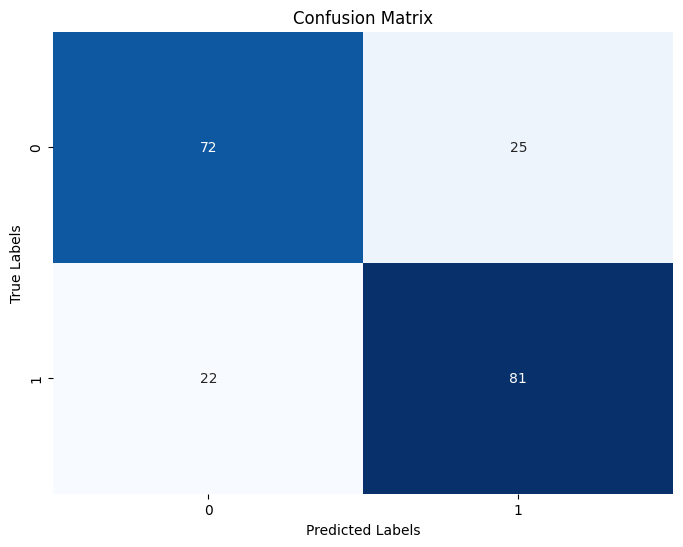

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have calculated the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [29]:
# Classification Report: Provides precision, recall, F1-score, and support for each class
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



<h2><b>HyperParameterTune the NaiveBayesClassifier</b></h2>

<h3>HyperParameterTune approach 1</h3>

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Create a parameter grid to specify the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter (Laplace smoothing)
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best model from the grid search
best_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on your testing data
y_pred_best = best_classifier.predict(X_test)

# Calculate and print metrics for the best model (e.g., accuracy, precision, recall, F1-score)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("Best Model Metrics:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)


Best Hyperparameters: {'alpha': 0.5, 'fit_prior': True}
Best Model Metrics:
Accuracy: 0.775
Precision: 0.7735849056603774
Recall: 0.7961165048543689
F1 Score: 0.7846889952153109


<h3>HyperParameterTune approach 2</h3>

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Define a range of alpha values to test
alpha_values = np.arange(0.1, 1.1, 0.1)

best_accuracy = 0.0
best_alpha = None

# Loop through each alpha value
for alpha in alpha_values:
    # Create a new Multinomial Naive Bayes classifier with the current alpha
    classifier = MultinomialNB(alpha=alpha)

    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy for the current alpha
    print("Accuracy score for alpha-{} is: {:.2f}%".format(round(alpha, 1), accuracy * 100))

    # Check if this alpha gives a better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

print("\nOptimal hyperparameters:")
print("Best accuracy: {:.2f}%".format(best_accuracy * 100))
print("Best alpha: {}".format(round(best_alpha, 1)))


Accuracy score for alpha-0.1 is: 78.00%
Accuracy score for alpha-0.2 is: 78.50%
Accuracy score for alpha-0.3 is: 78.00%
Accuracy score for alpha-0.4 is: 78.00%
Accuracy score for alpha-0.5 is: 77.50%
Accuracy score for alpha-0.6 is: 77.50%
Accuracy score for alpha-0.7 is: 77.50%
Accuracy score for alpha-0.8 is: 77.00%
Accuracy score for alpha-0.9 is: 76.50%
Accuracy score for alpha-1.0 is: 76.50%

Optimal hyperparameters:
Best accuracy: 78.50%
Best alpha: 0.2


In [32]:
clf = MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB()

# **Predictions**

In [33]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def predict_sentiment(sample_review, classifier, cv):
    # Preprocess the sample review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Transform the preprocessed review using the CountVectorizer (cv)
    temp = cv.transform([final_review]).toarray()

    # Use the pre-trained classifier to predict sentiment
    sentiment = classifier.predict(temp)

    return sentiment[0]  # Return the predicted sentiment (assuming it's a single value)


In [34]:
# Sample reviews as strings
reviews = [
    'The food is really bad.',
    'I love their delicious dishes!',
    'Terrible experience. Avoid this place.',
    'The service was excellent.',
    'Worst place ever, but nice food'
]

# Assuming you have already defined the 'predict_sentiment' function, classifier, and cv

for review in reviews:
    sentiment = predict_sentiment(review, classifier, cv)
    if sentiment:
        sentiment_label = 'POSITIVE'
    else:
        sentiment_label = 'NEGATIVE'

    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment_label}")
    print()


Review: 'The food is really bad.'
Sentiment: NEGATIVE

Review: 'I love their delicious dishes!'
Sentiment: POSITIVE

Review: 'Terrible experience. Avoid this place.'
Sentiment: NEGATIVE

Review: 'The service was excellent.'
Sentiment: POSITIVE

Review: 'Worst place ever, but nice food'
Sentiment: NEGATIVE

